In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from imblearn.over_sampling import SMOTE  
## SMOTE (Sentetic Minority Oversampling Technique), Sınıf dengesizliği, sınıflar arasında önemli bir orantısızlık olduğunda ortaya çıkar.
# azınlık sınıfındaki örneklerin çoğaltılması yoluyla veri setini dengeler.

from sklearn.decomposition import PCA
## PCA (Principal Component Analysis), çok boyutlu veri setlerinde boyut azaltma ve değişkenler arasındaki ilişkiyi anlama amacıyla kullanılan bir lineer cebir tekniğidir.

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import numpy as np

from sklearn.model_selection import cross_val_score
## Çapraz doğrulama, mevcut veri setinin farklı alt kümelerine bölünerek birden fazla model eğitimi ve değerlendirmesi yapılmasını içerir. Bu, modelin genel performansını
#  daha güvenilir bir şekilde değerlendirmeye yardımcı olur ve aşırı uyum (overfitting) sorununu azaltır.

from sklearn.model_selection import RepeatedStratifiedKFold
## makine öğrenimi modellerinin performansını değerlendirmek için kullanılan bir çapraz doğrulama yöntemidir.
# çapraz doğrulama, sınıf dengesizliği gibi durumlarda daha iyi bir performans değerlendirmesi sağlar.

from collections import Counter
## Counter sınıfı, bir dizi içindeki öğelerin sayısını tutmak için kullanılır.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data = pd.read_csv("failure.csv")

In [3]:
## EDA

In [4]:
data.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [5]:
data.tail()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0
124493,2015-11-02,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,0


In [6]:
data.sample(5)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
21597,2015-01-27,S1F0S34C,0,71779512,0,1331,0,13,222515,0,0,34
77012,2015-05-02,W1F1NS0C,0,232078760,0,0,0,6,240957,0,0,0
23408,2015-01-29,W1F1BS9T,0,135060904,0,0,0,12,249535,0,0,0
77204,2015-05-03,S1F10QG6,0,235427528,0,0,0,6,226356,0,0,0
2990,2015-01-03,W1F0SRG1,0,165895064,0,0,0,32,252330,0,0,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [8]:
data.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [9]:
data.isna().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [10]:
data.failure.value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [11]:
data.device.value_counts()

S1F0FGBQ    304
W1F0SJJ2    304
Z1F0GE1M    304
Z1F0KJDS    304
Z1F0KKN4    304
           ... 
Z1F0LT6P      5
Z1F0LT6Z      5
W1F1CJKT      5
S1F04KSC      4
W1F0WJFT      3
Name: device, Length: 1168, dtype: int64

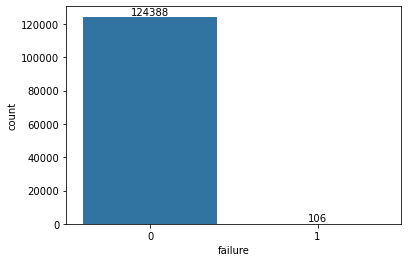

In [12]:
ax = sbn.countplot(x = data.failure)
ax.bar_label(ax.containers[0]);

In [13]:
data = data.drop(['date', 'device'], axis = 1)

In [14]:
data.head()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,0,215630672,56,0,52,6,407438,0,0,7
1,0,61370680,0,3,0,6,403174,0,0,0
2,0,173295968,0,0,0,12,237394,0,0,0
3,0,79694024,0,0,0,6,410186,0,0,0
4,0,135970480,0,0,0,15,313173,0,0,3


In [15]:
y = data.failure
x = data.drop('failure', axis = 1)

In [16]:
#pip install imbalanced-learn

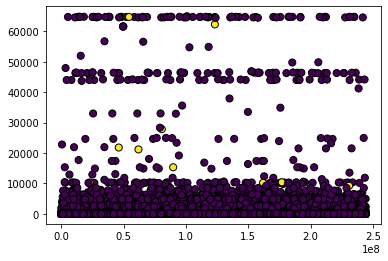

In [17]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], marker = 'o', c = y, s = 50, edgecolors = 'k');  # scatter plot (dağılım grafiği) 
## x veri setindeki sütunlardan ilki ve ikincisi, x ve y koordinatlarını temsil eder.
## Scatter plot'ta kullanılacak marker (nokta) tipini belirtir.
## c = y: Noktaların renklerini belirleyen bir dizi veya sütun. y, noktaların renklerini belirlemek için kullanılan değerlerdir.
## s = 50: Noktaların boyutunu belirler.
## edgecolors = 'k': Noktaların kenarlık rengini belirler. 'k' siyah rengi temsil eder

### PCA

In [18]:
pca = PCA(2)   ## eri setinin iki temel bileşene indirgeneceği anlamına gelir.
x_r = pca.fit_transform(x)

In [19]:
x_r

array([[-9.32439190e+07,  1.47464061e+05],
       [ 6.10160730e+07,  1.42871066e+05],
       [-5.09092154e+07, -2.26701757e+04],
       ...,
       [ 1.03357633e+08,  9.00139611e+04],
       [-1.04566655e+08,  9.90302523e+04],
       [ 1.04813913e+08,  9.10346557e+04]])

In [20]:
pca.explained_variance_ratio_  # PCA dönüşümünün her bir bileşenin veri setindeki değişkenliği açıklama oranını ve

array([9.99998019e-01, 1.98021459e-06])

In [21]:
sum(pca.explained_variance_ratio_)
## ifadesi 0.9 olarak döndürülüyorsa, bu, PCA tarafından kullanılan bileşenlerin veri setindeki değişkenliğin %90'ını açıkladığını gösterir. 
# Kalan %10'luk kısım, PCA tarafından dikkate alınmayan bileşenlere karşılık gelir.

0.9999999990292119

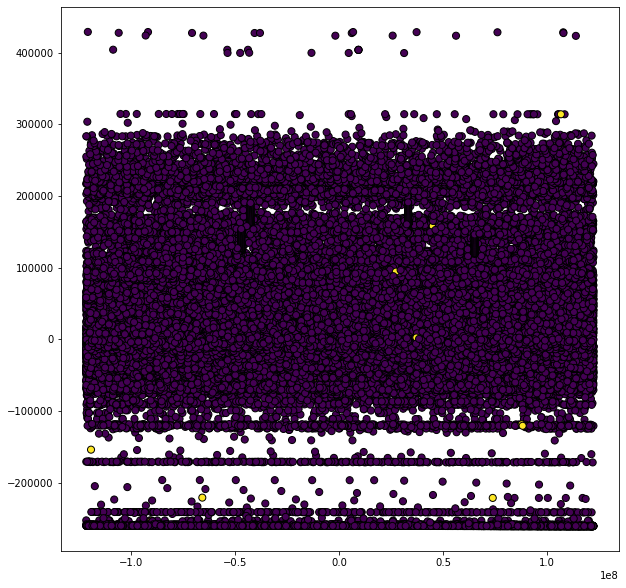

In [22]:
plt.figure(figsize = (10, 10))
plt.scatter(x_r[:, 0], x_r[:, 1], marker = 'o', c = y, s = 50, edgecolors = 'k');

## Model

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_r, y, test_size = 0.2, random_state = 42) 
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

In [24]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
tahmin = model.predict(x_test)
accuracy_score(tahmin, y_test) * 100

99.87148078236073

### Mean AUC(Area Under the Curve)

In [25]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
result = cross_val_score(model, x_r, y, scoring="roc_auc", cv=cv, n_jobs=-1)
print("Mean AUC: %.3f" % np.mean(result))
## PCA dönüşümü uygulandıktan sonra x_r veri seti üzerinde çapraz doğrulama kullanarak modelin performansını 
# değerlendirir ve ROC AUC skoru ile sonucu verir.

Mean AUC: 0.501


## Oversampling using SMOTE()

In [26]:
over = SMOTE()

x_r, y = over.fit_resample(x_r, y)

labels = Counter(y)
print("y labels after oversampling")
print(labels)
## Bu kod x ve ye değerlerinin sayısının aynı olamsını sağlar.

y labels after oversampling
Counter({0: 124388, 1: 124388})


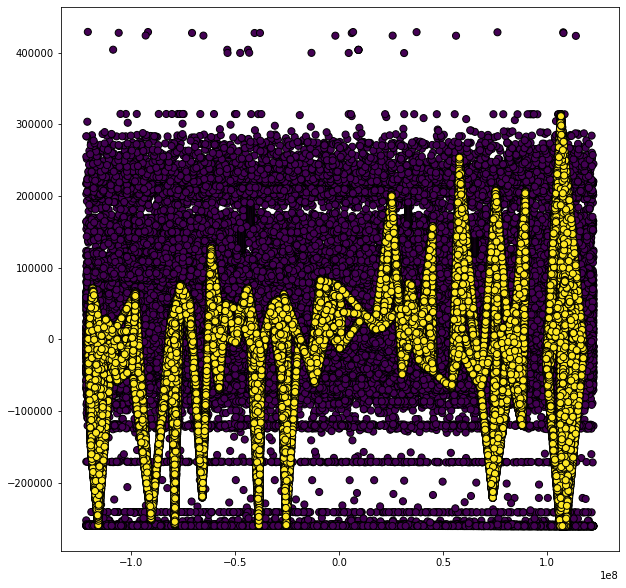

In [27]:
plt.figure(figsize = (10, 10))
plt.scatter(x_r[:, 0], x_r[:, 1], marker="o", c=y, s=50, edgecolor="k");

In [28]:
model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
result = cross_val_score(model, x_r, y, scoring="roc_auc", cv=cv, n_jobs=-1)

print("Mean AUC: %.3f" % np.mean(result))

Mean AUC: 0.930


## Deep Learning

In [29]:
model = Sequential()
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
              metrics = 'accuracy'
             )
## "adam", "sgd", "rmsprop" 
## "categorical_crossentropy", "binary_crossentropy"
## "accuracy", "precision", "recall"

In [30]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
3113/3113 [==============================] - 4s 981us/step - loss: 0.0193 - accuracy: 0.9991 - val_loss: 0.0078 - val_accuracy: 0.9993
Epoch 2/10
3113/3113 [==============================] - 3s 881us/step - loss: 0.0086 - accuracy: 0.9991 - val_loss: 0.0071 - val_accuracy: 0.9993
Epoch 3/10
3113/3113 [==============================] - 3s 897us/step - loss: 0.0088 - accuracy: 0.9991 - val_loss: 0.0069 - val_accuracy: 0.9993
Epoch 4/10
3113/3113 [==============================] - 3s 878us/step - loss: 0.0085 - accuracy: 0.9991 - val_loss: 0.0068 - val_accuracy: 0.9993
Epoch 5/10
3113/3113 [==============================] - 3s 876us/step - loss: 0.0085 - accuracy: 0.9991 - val_loss: 0.0068 - val_accuracy: 0.9993
Epoch 6/10
3113/3113 [==============================] - 3s 882us/step - loss: 0.0083 - accuracy: 0.9991 - val_loss: 0.0071 - val_accuracy: 0.9993
Epoch 7/10
3113/3113 [==============================] - 3s 881us/step - loss: 0.0083 - accuracy: 0.9991 - val_loss: 0.0063 -

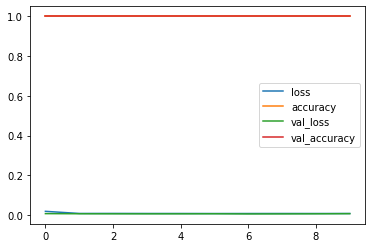

In [31]:
loss = pd.DataFrame(history.history)
loss.plot();

In [33]:
tahmin2 = (model.predict(x_test) > 0.5).astype("int32")
accuracy_score(tahmin2, y_test) * 100

779/779 [==============================] - 0s 520us/step


99.92770794007791